In [225]:
import glob

In [227]:
no_smile = glob.glob("C:/Users/SrishaRavi/Downloads/archive (4)/non_smile/*.jpg")

In [229]:
type(no_smile)

list

In [231]:
no_smile[0]

'C:/Users/SrishaRavi/Downloads/archive (4)/non_smile\\Aaron_Eckhart_0001.jpg'

In [233]:
smile= glob.glob("C:/Users/SrishaRavi/Downloads/archive (4)/smile/*.jpg")
test = glob.glob("C:/Users/SrishaRavi/Downloads/archive (4)/test/*.jpg")

In [235]:
len(smile),len(no_smile),len(test)

(600, 603, 12030)

In [237]:
from PIL import Image

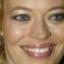

In [239]:
img = Image.open(smile[44])
img

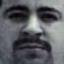

In [241]:
img = Image.open(no_smile[44])
img

In [243]:
data = []
label = []


In [245]:
import numpy as np
fixed_size = (64,64)
for i in smile:
    image = Image.open(i)
    image = image.convert("L")
    image = image.resize(fixed_size)
    image = np.array(image).flatten()
    data.append(image)
    label.append(1)
for i in no_smile:
    image = Image.open(i)
    image = image.convert("L")
    image = image.resize(fixed_size)
    image = np.array(image).flatten()
    data.append(image)
    label.append(0)

In [247]:
X = np.array(data)
y = np.array(label)

In [249]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42,shuffle=True)

In [251]:
len(data),len(label)

(1203, 1203)

In [253]:
# Model Building

In [257]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 0.01, max_iter= 100, penalty= 'l2')

In [259]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [261]:
model.fit(X_train_scaled,y_train)

LogisticRegression(C=0.01)

In [263]:
y_pred = model.predict(X_test_scaled)

In [265]:
# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))

Accuracy Score: 0.8421052631578947
Confusion Matrix:
 [[146  24]
 [ 33 158]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.86      0.84       170
           1       0.87      0.83      0.85       191

    accuracy                           0.84       361
   macro avg       0.84      0.84      0.84       361
weighted avg       0.84      0.84      0.84       361



In [205]:
# Hyper parameter Tuning

In [267]:
param = {"C":[0.001,0.01,0.1,1,10,100],
        "penalty":["l1","l2","elasticnet","none"],
        "max_iter":[100,200,300]}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = model,param_grid = param,n_jobs = -1,cv = 5,scoring = "accuracy")
grid_search.fit(X_train_scaled,y_train)

C:\Users\SrishaRavi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
270 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SrishaRavi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SrishaRavi\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SrishaRavi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172,

GridSearchCV(cv=5, estimator=LogisticRegression(C=0.01), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [268]:

print("Best Parameters:",grid_search.best_params_)
print("Accuracy Score:",grid_search.best_score_)

Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2'}
Accuracy Score: 0.8954564666103128


In [285]:
import pickle

In [287]:
pickle.dump(model,open("my_model.pkl","wb"))

In [289]:
pickle.dump(scaler,open("my_scaler.pkl","wb"))

In [291]:
import gradio as gr

In [299]:
from joblib import load,dump

In [301]:
dump(model,"smile_detector_model.joblib")
dump(scaler,"scaler.joblib")
model = load("smile_detector_model.joblib")
scaler = load("scaler.joblib")

In [303]:
def detect_smilingface(img):
    image = img.convert("L").resize((64,64))
    image = np.array(image).flatten().reshape(-1,1)
    image = scaler.transform(image)
    pred = model.predict(image[0])
    return "😁 Smile Detected! - Smiley face" if pred == 1 else "😐 No Smile!!!"

In [305]:
#Gradio Interface

In [311]:
iface = gr.Interface(
    fn = detect_smilingface,
    inputs = gr.Image(type = "pil"),
    outputs = "text",
    title = "Smile Detector 😊",
    description = "Hello peeps!! I have a created an AI model,photo, please give it a try!",
    theme = "default"
)
iface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
